In [1]:
import numpy as np

import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
#df still has depths
DATA_PATH = Path.cwd()

df = pd.read_csv(DATA_PATH / "min_log.csv", thousands = ",")
df_depth_removed = df#.drop(columns = ["depth [ft]"])
df_depth_removed

,depth [ft],Calcite,Chlorite,Dolomite,Hematite,Illite,K-Feldspar,Kaolinite,Porosity,Quartz,Clay,Bulk
0,4361.25,0.92588,0.00000,0.00000,0.00000,0.00081,0.04413,0.01871,0.00140,0.00906,0.02091,62.943448
1,4361.75,0.91290,0.00000,0.00000,0.00000,0.01286,0.04058,0.01871,0.00292,0.01203,0.03449,71.044345
2,4362.25,0.89792,0.00000,0.00000,0.00000,0.02690,0.03663,0.01871,0.00612,0.01373,0.05029,74.103034
3,4362.75,0.88793,0.00000,0.00000,0.00000,0.02208,0.03811,0.01871,0.01713,0.01604,0.04486,65.059310
4,4363.25,0.88843,0.00000,0.00000,0.00000,0.00042,0.04504,0.01871,0.02810,0.01929,0.02048,57.365241
...,...,...,...,...,...,...,...,...,...,...,...,...
4127,6424.75,0.00000,0.12495,0.12561,0.03905,0.00000,0.36997,0.00000,0.02790,0.31253,0.13944,46.679172
4128,6425.25,0.00000,0.13879,0.12414,0.03595,0.00000,0.36525,0.00000,0.01995,0.31592,0.15489,48.549379
4129,6425.75,0.00000,0.14742,0.12339,0.03594,0.00000,0.36277,0.00000,0.01711,0.31336,0.16452,50.700552
4130,6426.25,0.00000,0.14721,0.11722,0.03946,0.00000,0.36283,0.00000,0.01708,0.31621,0.16428,52.013655


## Without NN - with a validation set (70-15-15 split)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Train = 3305, Test = 826
y = df_depth_removed["Bulk"].values.reshape(-1, 1)
X = df_depth_removed.drop(columns=["Bulk"]).values

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,  # Use 30% of the data for training
    random_state=42,
)

# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # Use 50% of the remaining data for validation and test
    random_state=42,
)

# Models
model_lin_reg = LinearRegression()
model_decision_trees = DecisionTreeRegressor()
model_grad_boost = GradientBoostingRegressor()

# Training
model_decision_trees.fit(X_train, y_train)
model_lin_reg.fit(X_train, y_train)
model_grad_boost.fit(X_train, y_train)

# Prediction on the validation set
y_pred_lin_reg_val = model_lin_reg.predict(X_val)
y_pred_decision_trees_val = model_decision_trees.predict(X_val)
y_pred_grad_boost_val = model_grad_boost.predict(X_val)

# Prediction on the test set
y_pred_lin_reg_test = model_lin_reg.predict(X_test)
y_pred_decision_trees_test = model_decision_trees.predict(X_test)
y_pred_grad_boost_test = model_grad_boost.predict(X_test)

# Calculate MSE on the validation set
mse_lin_reg_val = mean_squared_error(y_val, y_pred_lin_reg_val)
mse_decision_trees_val = mean_squared_error(y_val, y_pred_decision_trees_val)
mse_grad_boost_val = mean_squared_error(y_val, y_pred_grad_boost_val)

# Calculate MSE on the test set
mse_lin_reg_test = mean_squared_error(y_test, y_pred_lin_reg_test)
mse_decision_trees_test = mean_squared_error(y_test, y_pred_decision_trees_test)
mse_grad_boost_test = mean_squared_error(y_test, y_pred_grad_boost_test)

# Dataframe
loss_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Trees', 'Gradient Boosting'],
    'Mean Squared Error (Validation)': [mse_lin_reg_val, mse_decision_trees_val, mse_grad_boost_val],
    'Mean Squared Error (Test)': [mse_lin_reg_test, mse_decision_trees_test, mse_grad_boost_test]
})

# Print the DataFrame
loss_df


,Model,Mean Squared Error (Validation),Mean Squared Error (Test)
0,Linear Regression,14.117725,15.936673
1,Decision Trees,10.079880,8.446611
2,Gradient Boosting,5.322131,6.614176


In [4]:
# Create a DataFrame with validation truth and predicted values
results_df_val = pd.DataFrame({
    'Depth': X_val[:, 0],  # Assuming depth is the first column in X_val
    'True Values (Validation)': y_val.flatten(),
    'Linear Regression Predictions (Validation)': y_pred_lin_reg_val.flatten(),
    'Decision Trees Predictions (Validation)': y_pred_decision_trees_val.flatten(),
    'Gradient Boosting Predictions (Validation)': y_pred_grad_boost_val.flatten()
})



# Create a DataFrame with test truth and predicted values
results_df_test = pd.DataFrame({
    'Depth': X_test[:, 0],  # Assuming depth is the first column in X_test
    'True Values (Test)': y_test.flatten(),
    'Linear Regression Predictions (Test)': y_pred_lin_reg_test.flatten(),
    'Decision Trees Predictions (Test)': y_pred_decision_trees_test.flatten(),
    'Gradient Boosting Predictions (Test)': y_pred_grad_boost_test.flatten()
})



In [5]:
# Display the DataFrame with depth, true values, and predictions for the validation set
results_df_val

,Depth,True Values (Validation),Linear Regression Predictions (Validation),Decision Trees Predictions (Validation),Gradient Boosting Predictions (Validation)
0,5168.25,24.670138,24.305232,23.706759,24.777461
1,4481.25,40.978690,41.652628,38.674276,39.879038
2,5520.25,23.427172,23.849655,24.276069,23.361853
3,5293.25,23.552414,20.860077,22.804483,22.632115
4,6115.25,18.568207,18.392554,20.921103,19.430549
...,...,...,...,...,...
615,5711.25,28.454483,25.640140,27.695724,26.363864
616,5966.25,19.050345,18.040772,16.830621,19.157357
617,6261.75,18.502828,15.060100,17.733172,18.401352
618,5609.25,23.832966,25.350219,23.170138,24.758541


In [6]:
# Display the DataFrame with depth, true values, and predictions for the test set
results_df_test

,Depth,True Values (Test),Linear Regression Predictions (Test),Decision Trees Predictions (Test),Gradient Boosting Predictions (Test)
0,4762.25,57.851655,66.498618,58.381793,60.780261
1,5571.25,25.786690,25.617991,24.499517,24.931019
2,4421.25,65.894000,63.231723,70.113103,69.700885
3,6218.75,22.259034,19.271512,22.387310,19.908031
4,5155.25,25.561448,25.051975,25.204483,25.508715
...,...,...,...,...,...
615,4611.75,47.651103,47.210171,50.321862,48.886701
616,5505.25,21.416621,20.512483,20.620621,20.922300
617,5805.75,25.559724,25.739170,25.342207,25.273645
618,4465.75,50.288276,44.704461,49.434483,48.774521


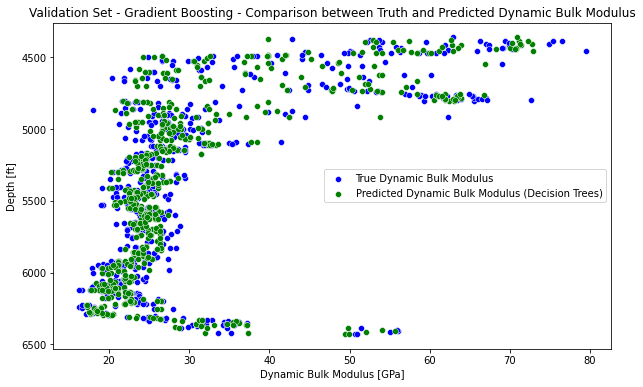

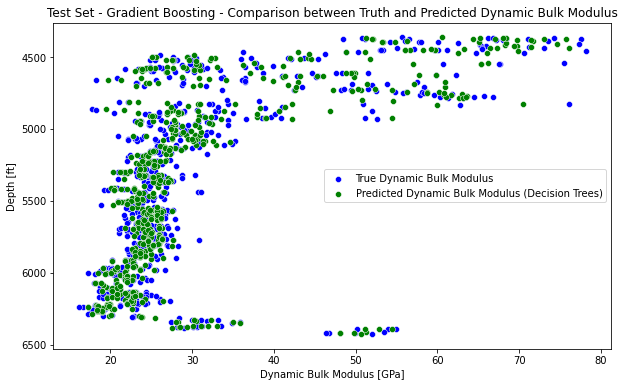

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Linear Regression - Validation Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_df_val['True Values (Validation)'], y=results_df_val['Depth'], label='True Dynamic Bulk Modulus', color='blue')
sns.scatterplot(x=results_df_val['Gradient Boosting Predictions (Validation)'], y=results_df_val['Depth'], label='Predicted Dynamic Bulk Modulus (Decision Trees)', color='green')
# Reverse the y-axis
plt.gca().invert_yaxis()

plt.title('Validation Set - Gradient Boosting - Comparison between Truth and Predicted Dynamic Bulk Modulus')
plt.xlabel('Dynamic Bulk Modulus [GPa]')
plt.ylabel('Depth [ft]')
plt.legend()
plt.show()

# Scatter plot for Linear Regression - Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_df_test['True Values (Test)'], y=results_df_test['Depth'], label='True Dynamic Bulk Modulus', color='blue')
sns.scatterplot(x=results_df_test['Gradient Boosting Predictions (Test)'], y=results_df_test['Depth'], label='Predicted Dynamic Bulk Modulus (Decision Trees)', color='green')
plt.gca().invert_yaxis()

plt.title('Test Set - Gradient Boosting - Comparison between Truth and Predicted Dynamic Bulk Modulus')
plt.xlabel('Dynamic Bulk Modulus [GPa]')
plt.ylabel('Depth [ft]')
plt.legend()
plt.show()
